# Uso de la transformada de Fourier en una señal variante en el tiempo

In [1]:
import numpy as np
from scipy.fft import fft, fftfreq, fftshift, ifftn
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib as mpl
from astropy.io.fits.hdu import image
from astropy.io import fits


#### Generamos un arreglo "time" de 1000 elementos, y dividimos el valos de sus elementos entre 1000, lo que nos da un intervalo de 0 a 1[s] con un time step de .001


In [3]:
time = np.arange(1000)/1000 

##### Generamos una señal senoidal con f=50 y que varie en el tiempo 

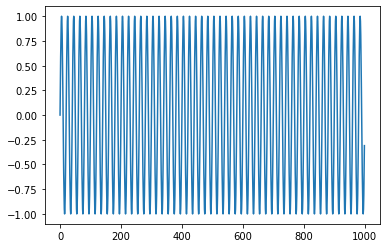

In [4]:

signalSinus= np.sin(50*2.0*np.pi*time)
plt.plot(signalSinus)

### Transformada de Fourier
#### Aplicamos la transformada de fourier a la señal Sin, de la cual tendremos un arreglo con elementos (r,ij). Debemos hacer un plot del valor absoluto de esos valores, de donde obtendremos las espigas correspondientes a l frecuencia de la señal.
#### Utilizando fftfreq, vamos a obtener el eje X [hz] y su correspondiente eje Y sera el absoluto de la fft de la señal

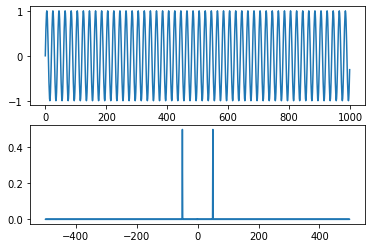

In [5]:

n=signalSinus.size                       #magnitud del arreglo
timestep=.001                            #intervalo en segundos de cada muestra

fftSin=np.fft.fft(signalSinus)           #Amplitud de la espiga
fftFreqSin=np.fft.fftfreq(n,d=timestep)  #frecuencia de la espiga

fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(signalSinus)
ax2.plot(fftFreqSin,1/n*(np.abs(fftSin)))
plt.show()


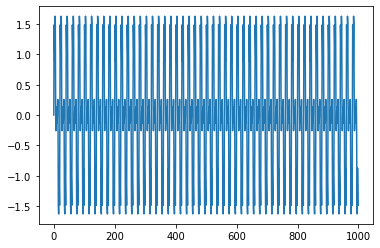

In [6]:
Sin_50= np.sin(50*2.0*np.pi*time)
Sin_100=0.75*np.sin(100*2.0*np.pi*time)
Sin_250=0.5*np.sin(250*2.0*np.pi*time)
Sin_300=0.25*np.sin(300*2.0*np.pi*time)
sum=Sin_50+Sin_100+Sin_250+Sin_300
plt.plot(sum)


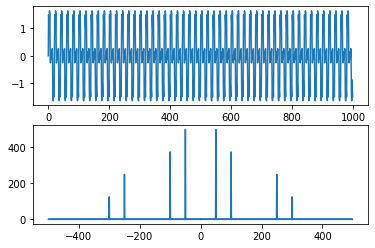

In [7]:

n=sum.size                       #magnitud del arreglo
timestep=.001                            #intervalo en segundos de cada muestra

fft_Sum=np.fft.fft(sum)           #Amplitud de la espiga
fftFreqSin=np.fft.fftfreq(n,d=timestep)  #frecuencia de la espiga

fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(sum)
ax2.plot(fftFreqSin,(np.abs(fft_Sum)))
plt.show()

### Ejemplo con una imagen fits

In [49]:
# clean example
x_data=np.arange(1,700,1)  #need to be the same size of the image
y_data=np.arange(1,650,1)
path='/home/oem/datosFits/testMITLL/05DIC22/'
file='proc_skp_module24_MITLL01_externalVr-4_Vtest_T170_testLeakage_vtest_vdd-22__NSAMP1_NROW650_NCOL700_EXPOSURE0_NBINROW1_NBINCOL1_img2.fits'

In [50]:
X, Y =np.meshgrid(x_data,y_data) #creates a grid with the axis on XY plain
hdul=fits.open(path+file)# fits file to analyze
data=hdul[1].data #numpy array
header=hdul[1].header
data.shape


(650, 700)

In [51]:
hdul=fits.open(path+file)# fits file to analyze
Z_data=hdul[1].data #numpy array #choose the extention you want to use
header=hdul[1].header
Z_data.shape

(650, 700)

ValueError: shape mismatch: objects cannot be broadcast to a single shape

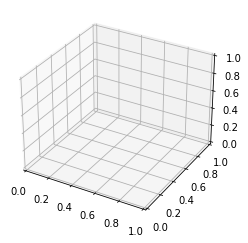

In [52]:
ax=plt.axes(projection="3d")
ax.plot_surface(X,Y,Z_data, cmap="gray") #cmap='plasma' looks good
ax.set_title("fits inmage on 3D plot")
ax.set_xlabel("NColumn in X")
ax.set_ylabel("NRows in Y")
ax.set_zlabel("ADUs in Z")
plt.show()

In [20]:
n=800                       #magnitud del arreglo
timestep=1               #intervalo en segundos de cada muestra

fft_Z=np.fft.fft(Z_data[1])           #Amplitud de la espiga
fftFreqZ=np.fft.fftfreq(n,d=timestep)  #frecuencia de la espiga


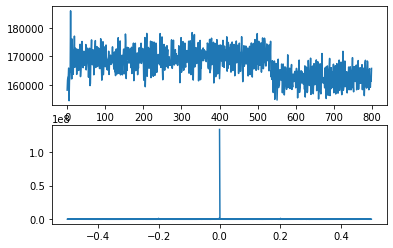

In [29]:
fig, (ax1,ax2)=plt.subplots(2,1)
ax1.plot(Z_data[2])
ax2.plot(fftFreqZ,(np.abs(fft_Z)))
plt.show()

